# 网络构建

In [29]:
from torch import nn

class simpleDNN(nn.Module):
    
    def __init__(self, input_dim, hidden1_n, hidden2_n, output_dim):
        super(simpleDNN, self).__init__()
        self.layer = nn.Sequential(# 第一层隐藏层
                                  nn.Linear(input_dim, hidden1_n),
                                  nn.BatchNorm1d(hidden1_n),
                                  nn.ReLU(True), 
                                  # 第二层隐藏层
                                  nn.Linear(hidden1_n, hidden2_n),
                                  nn.BatchNorm1d(hidden2_n),
                                  nn.ReLU(True),
                                  # 输出层
                                  nn.Linear(hidden2_n, output_dim))
    
    def forward(self, x):
        x = self.layer(x)
        return x

# 数据集加载、模型训练及模型评估

In [55]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 初始化参数
batch_size = 100
learning_rate = 1e-2
num_epochs = 100

# 实例化数据转换器
data_transforms = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize([0.5], [0.5])])
# 获取数据
train_dataset = datasets.MNIST(root='./data', train=True, 
                              transform=data_transforms, download=False)
test_dataset = datasets.MNIST(root='./data', train=False,
                            transform=data_transforms)
# 随机获取批量 训练数据
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

# 实例化模型
model = simpleDNN(28 * 28, 300, 100, 10)

# 选择损失函数
criterion = nn.CrossEntropyLoss()

# 选择优化器
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 模型训练
lloss = []
for epoch in range(num_epochs):
    # 启用 BatchNormalization 和 Dropout 进行训练模式
    model.train()
    for data in train_loader:
        # 获取图像 及 标签
        img, label = data
        # 将数据维度由 [64, 1, 28, 28] 转换成 [64, 1*28*28] 即 [64, 784] 
        img = img.view(img.size(0), -1)
        img = Variable(img)
        label = Variable(label)

        # 计算输出
        output = model(img)
        # 计算损失值
        loss = criterion(output, label)
        # 清零梯度缓存
        optimizer.zero_grad()
        # 计算损失函数的梯度
        loss.backward()
        # 更新参数
        optimizer.step()
    print('epoch:{0}, loss:{1}'.format(epoch, loss))
    lloss.append(loss)

# torch.save(model, 'mnist_DNN_practice06')

epoch:0, loss:0.3561164140701294


KeyboardInterrupt: 

# 可视化损失函数

ERROR:root:Line magic function `%matplot` not found.


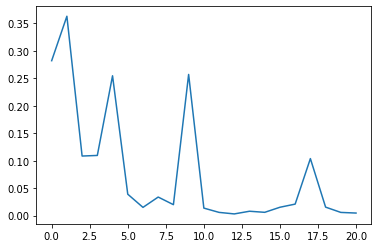

In [54]:
%matplot inline
plt.plot(list(range(len(lloss))), lloss)
plt.show()

# 评估模型

In [50]:
# 不启用 BatchNormalization 和 Dropout 进行测试模式
model.eval()
for data in test_loader:
    img, label = data
    vimg = img.view(img.size(0), -1)
    vimg = Variable(vimg)
    output = model(vimg)
    accs += ((output.argmax(axis=1)==test_y).sum()).tolist()/batch_size
print('Test Accuracy：{:.4f}'.format(accs/(x_test.shape[0]/batch_size)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1792x28 and 784x300)